In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
path='E:/ISIC DATA'
trainingpath='E:/Training'

In [3]:
import pickle
name="isic_data"
df=pickle.load(open(name,"rb"))

In [4]:
import cv2

In [5]:
filelist=os.listdir(path)
meta=[file for file in filelist if not file.endswith(".jpeg") and not file.endswith(".png") and file.startswith("ISIC")]
pics=[file for file in filelist if (file.endswith(".jpeg") or file.endswith(".png")) and file.startswith("ISIC")]

In [29]:
filename=path+'/'+pics[74]
#filename=path+'/'+pics[71]
img=cv2.imread(filename,0)
print(filename)

E:/ISIC DATA/ISIC_0000074.jpeg


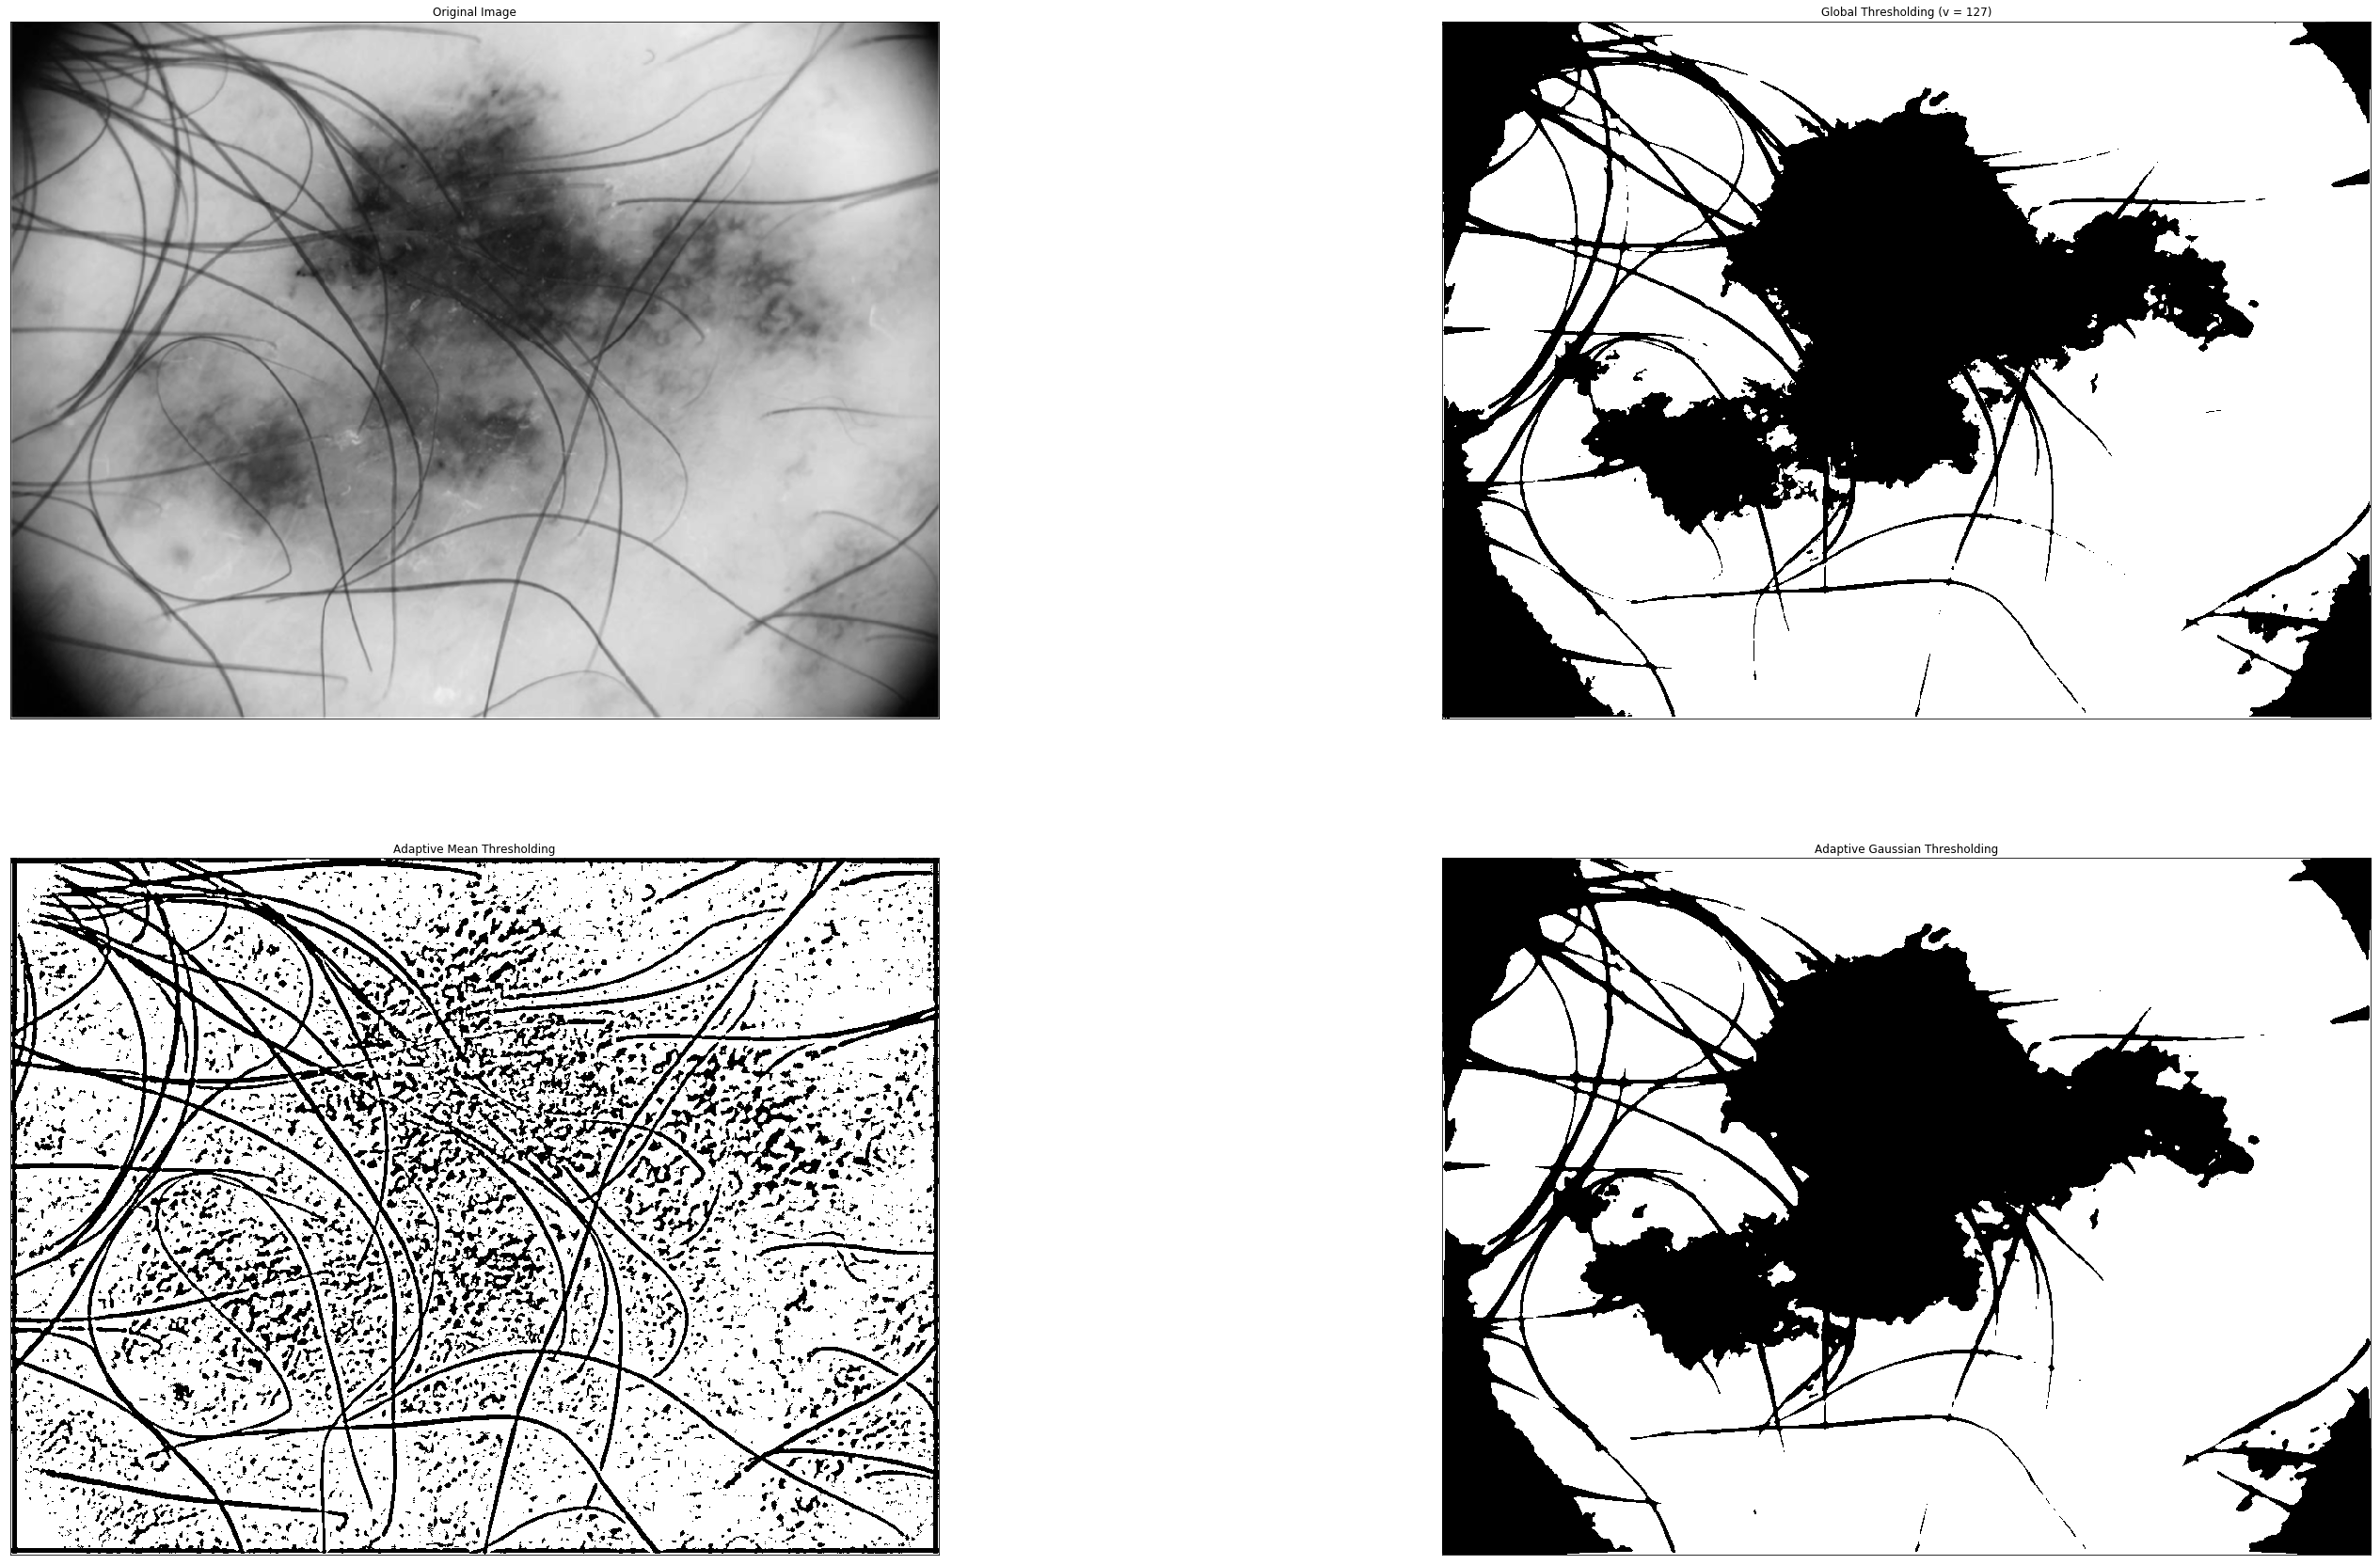

In [30]:
plt.figure(figsize = (50,30))
img = cv2.GaussianBlur(img,(3,3),0)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in np.arange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

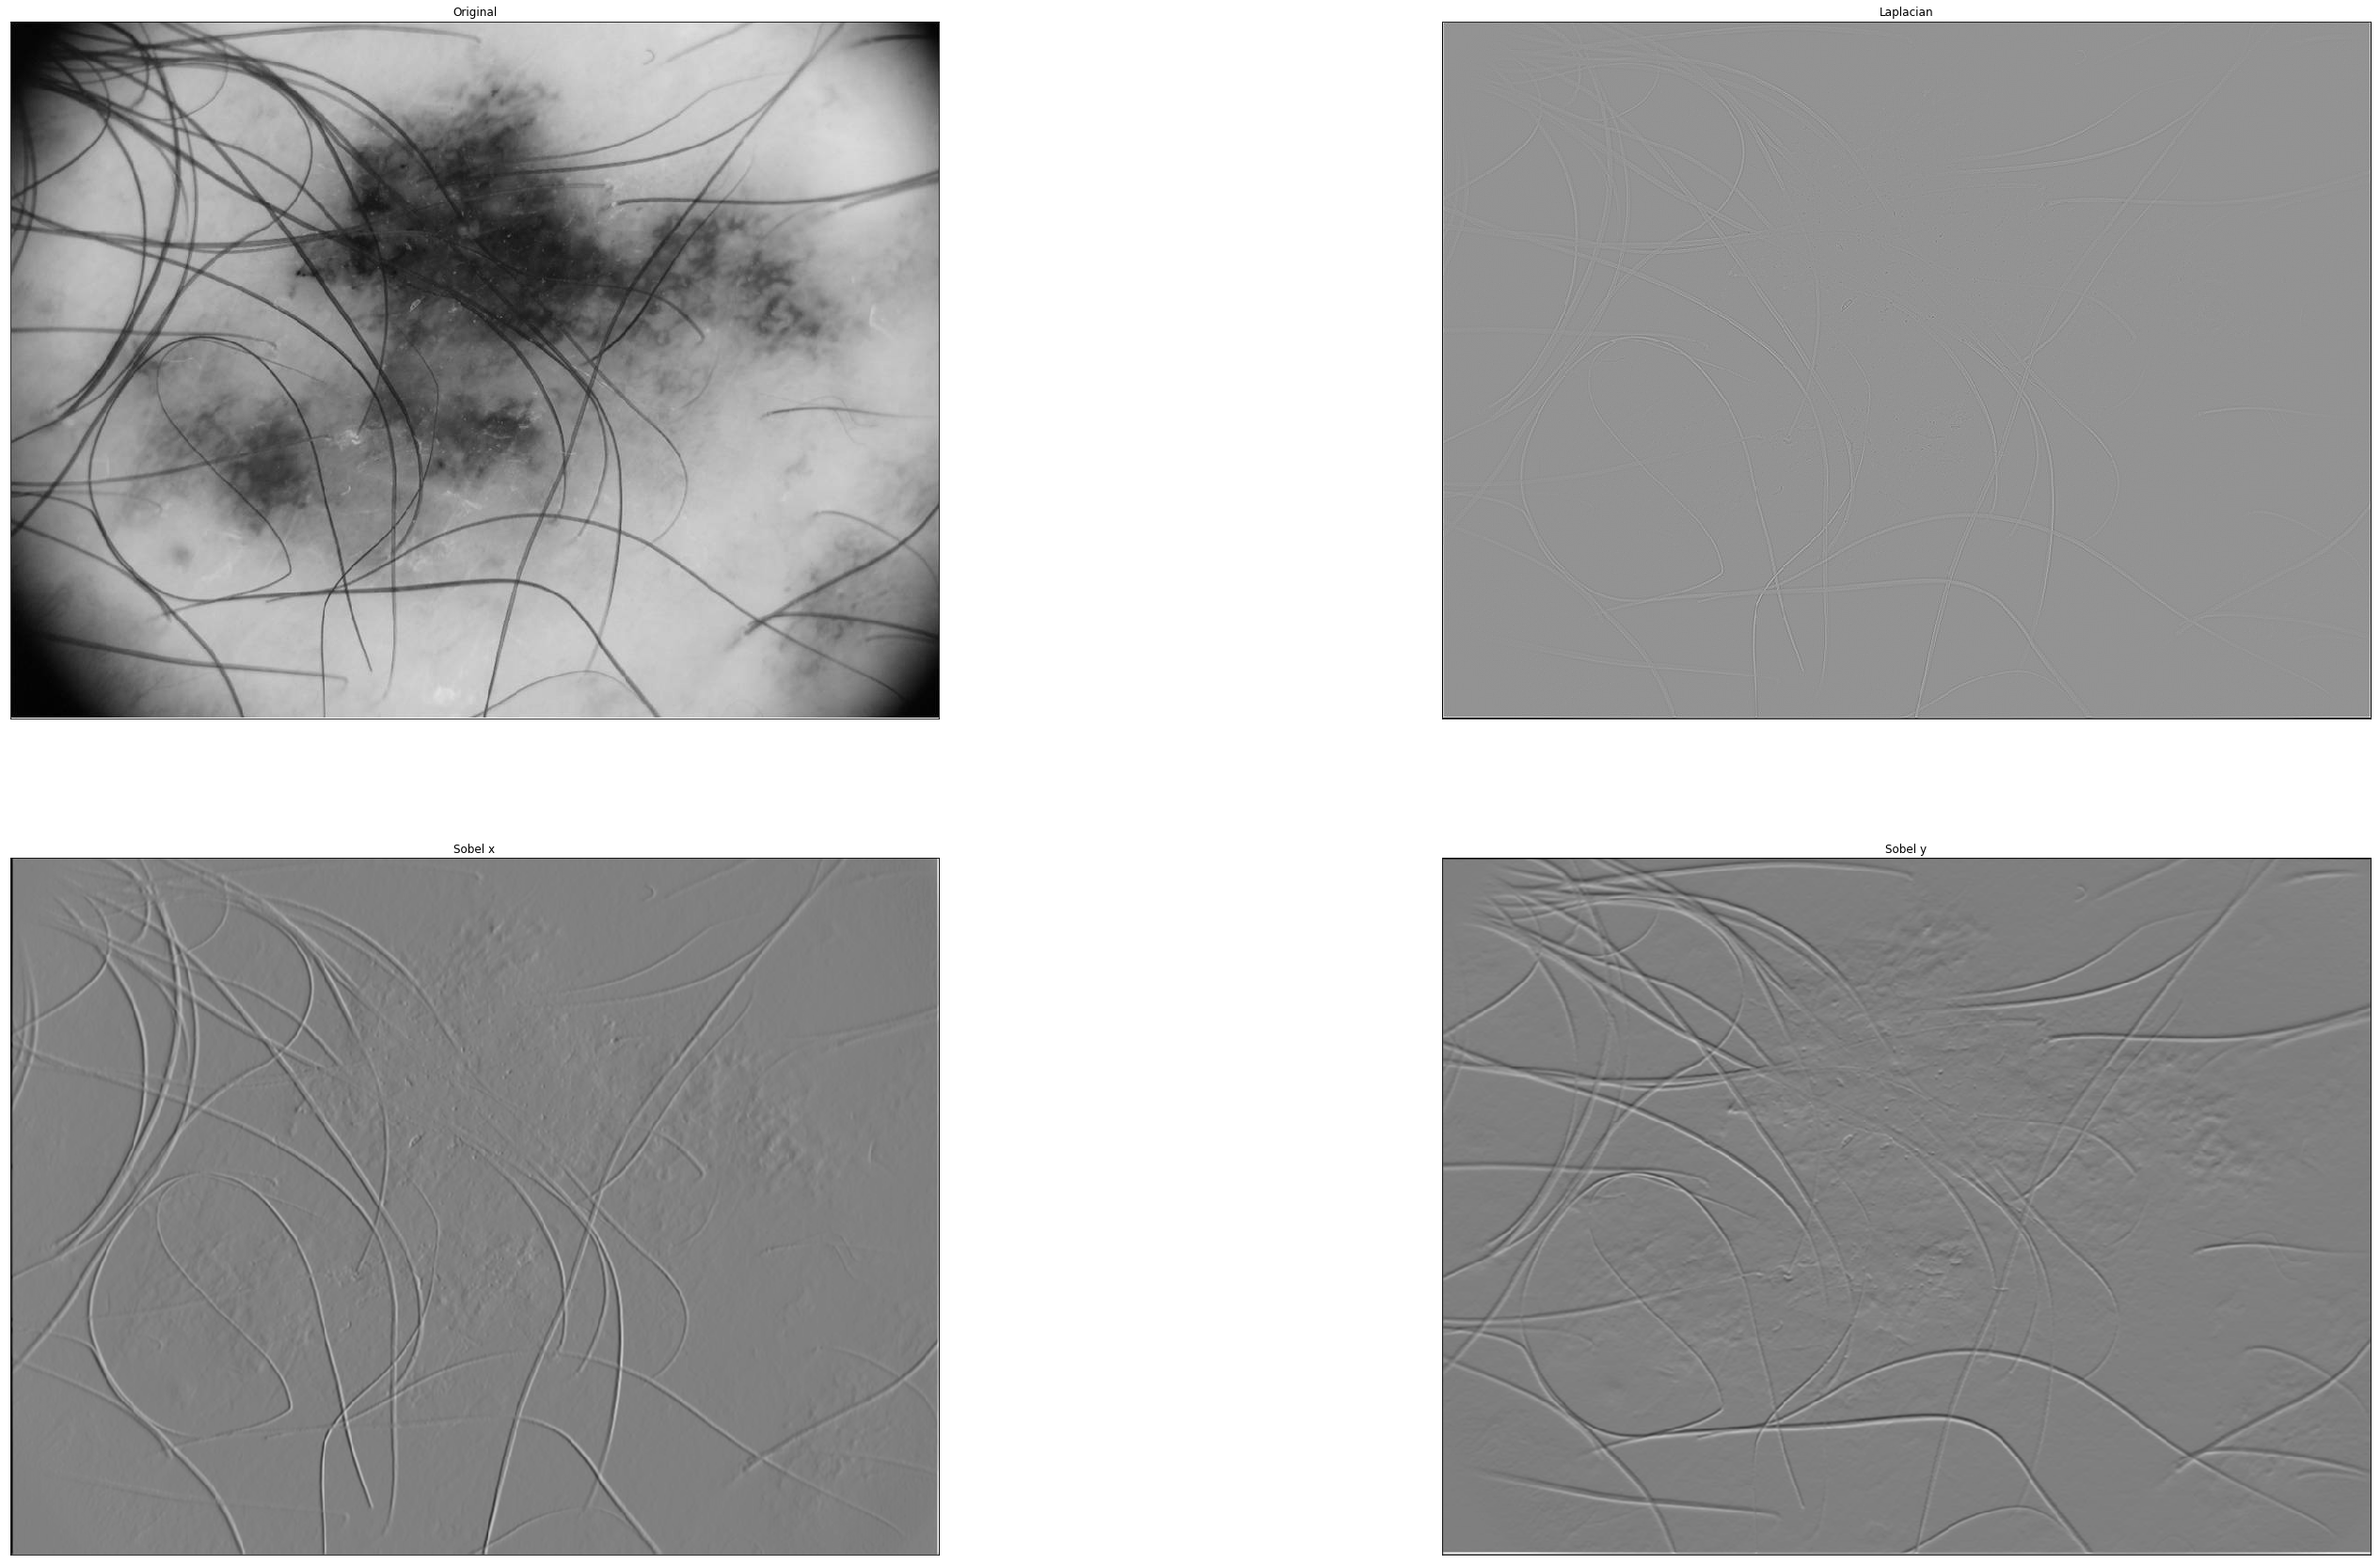

In [31]:
plt.figure(figsize = (50,30))
img=cv2.imread(filename,0)
plt.subplot(2,2,1),plt.imshow(img,cmap='gray')
plt.title('Original'), plt.xticks([]),plt.yticks([])
laplace=cv2.Laplacian(img,cv2.CV_64F)
plt.subplot(2,2,2),plt.imshow(laplace,cmap='gray')
plt.title('Laplacian'), plt.xticks([]),plt.yticks([])
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
plt.subplot(2,2,3),plt.imshow(sobelx,cmap='gray')
plt.title('Sobel x'), plt.xticks([]),plt.yticks([])
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,4),plt.imshow(sobely,cmap='gray')
plt.title('Sobel y'), plt.xticks([]),plt.yticks([])
plt.show()

In [32]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=100)
circle_df=pd.DataFrame(circles[0,:],columns=['x','y','radius'])

In [33]:
height, width =img.shape[:2]
print(height, width)

767 1022


In [34]:
# This is a part of the code I got off of CV2 documentation on circle detecting

img=cv2.imread(filename,0)
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)
#img = cv2.medianBlur(img,5)
#img = cv2.blur(img,(5,5))
#img = cv2.GaussianBlur(img,(5,5),0)
#img=cv2.bilateralFilter(img,9,75,75)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=60,param2=100,minRadius=round(height/3),maxRadius=round(width/2))

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,255),1)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
circle_df=pd.DataFrame(circles[0,:],columns=['x','y','radius'])

In [35]:
#img = cv2.medianBlur(img,5)
#img = cv2.blur(img,(5,5))
img = cv2.GaussianBlur(img,(5,5),0)
#img=cv2.bilateralFilter(img,9,75,75)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
# Take average of the circles and make it into one circle
average_x=int(circle_df.x.mean())
average_y=int(circle_df.y.mean())
average_radius=int(circle_df.radius.mean())

cv2.circle(cimg,(average_x,average_y),average_radius,(0,255,255),1)
cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()